# ML App to Forecast the Stock Market

## Introduction:

This project aims to develop a system that examines and tries to forecast the stock market. Stock markets are an interesting entity where the price movement or behaviour at certain times can be attributed to events that occur around the world, which in turns influences the buyers and sellers. Other example that influences the market can be the year-end tax loss sales. This is when traders sell their losses at the end of the year due to the nature of tax laws, leading to a downward price movement. However, when this event/phenomenon has been broadcast, traders then attempts to get ahead of the curve by buying these stocks in late December and selling them to expecting buyers in January. Becasue of this, the effect on the market will then be diluted. Overall it can be said that the price movement are largely influenced by the buyers and sellers themselves and their mentality behind each move. The system will attempt to build and test a trading strategy. 

## Dataset:

Data will be from the S&P 500 avaible from the last few years. The pandas package also allows for stock price data to be obtained, from Yahoo! or Google.

## Breakdown of this Project:

- Exploring the types of market analysis
- Stock Market Research
- Develop a trading System


# 1 Exploring the types of market analysis:

There are many financial instruments such as stocks, bonds, ETFs, FOREX and swaps, however, for this project, it will be limited to stocks and the stock market.

Stock: 
- Is a fractional share of ownership in a public listed company. The stock price is the price for every share.

There are also two types of investors, where the first is the fundamental analyst and the second is the technical anayst.

Fundamental analyst:
- These analyst investigates the company's financials looking for information that indicates if the market is undervaluing the shares. The factors innvestigated are revenue, earnings and cash flow, or types of ratios. Valuation of these comapanies are ususally compared to another.

Technical Analyst:
- Have a different approach where the analyst believes that the share prices reflects publicaly available infromation. They investigate historical prices (price rise, fall or stagnate) and its movements through time, where it may reveal clues regarding investor psychology.

# 2 Stock Market Research:

There are three forms mentioned in the efficient market hypothesis and these are called a weak form, a semi-strong form and a strong form. 

- The Weak Form: is where the market is considered efficient enough that the past information of prices cannot be used to predict future prices. This means that the information is reflected in stocks quickly making technical analysis ineffective and where in somoe scenarios, only fundamental analysis would be effective.

- The Semi-strong Form: is where the prices can be seen to immediately reflect relevant new public information circulating. This means that both the technical analysis and fundamental analysis would be ineffective.

- The Strong Form: is where the stock prices does reflect all public and private infromation. 

Overall, the market can be considered to be largely efficient in terms of its operations, However, often the money making opportunities occur when or during distinct intervals of market inefficiency. Such events can sometimes be detected by momentum strategies.

## 2.1 Momentum Strategies:

Momentum strategies can be summed up as stocks are ranked from the highest down to the lowest according to its return over a prior period. It has been suggested that people then to underreact to news during the short tem and proceed to overreact to news in the long term. This translate to investors failing to increase the prices sufficiently when the stocks are reacting to exceptionally good news and that it takes time for the investors to come around. This tendency can be called the anchoring effect.

# 3 Import the required Libraries:

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import datetime as datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', 200)

# 4 Get the Data from source:

The data here would be obtained from 'SPY' ETF and these represents the stocks of the S&P 500. The data pulled would also be set to start from the year 2010 until December of 2019.

## 4.1 Import the required library:

In [77]:
import pandas_datareader as pdr

In [78]:
# Datetime format here: YYYY-MM-DD
start_date = pd.to_datetime('2010-01-01')
stop_date = pd.to_datetime('2019-12-01')

In [79]:
spy_df = pdr.data.get_data_yahoo('SPY', start_date, stop_date)
spy_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,112.800003,111.389999,112.769997,111.440002,90637900.0,91.241043
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.788483
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,93.034081
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,93.099579
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,93.492622
...,...,...,...,...,...,...
2019-11-22,311.239990,309.850006,311.089996,310.959991,44850200.0,309.438629
2019-11-25,313.369995,311.980011,311.980011,313.369995,48647200.0,311.836853
2019-11-26,314.279999,313.059998,313.410004,314.079987,37569000.0,312.543365


In [80]:
type(spy_df)

pandas.core.frame.DataFrame

## 4.2 Plot the Price data: 

As it can be seen from the table above, there are several columns of price data (High, Low, Open and Close), including the Volume and Adj Close. The following plot only uses the __Closing price__, and should see a price chart of the daily closing price of the S&P 500 during the selected period.

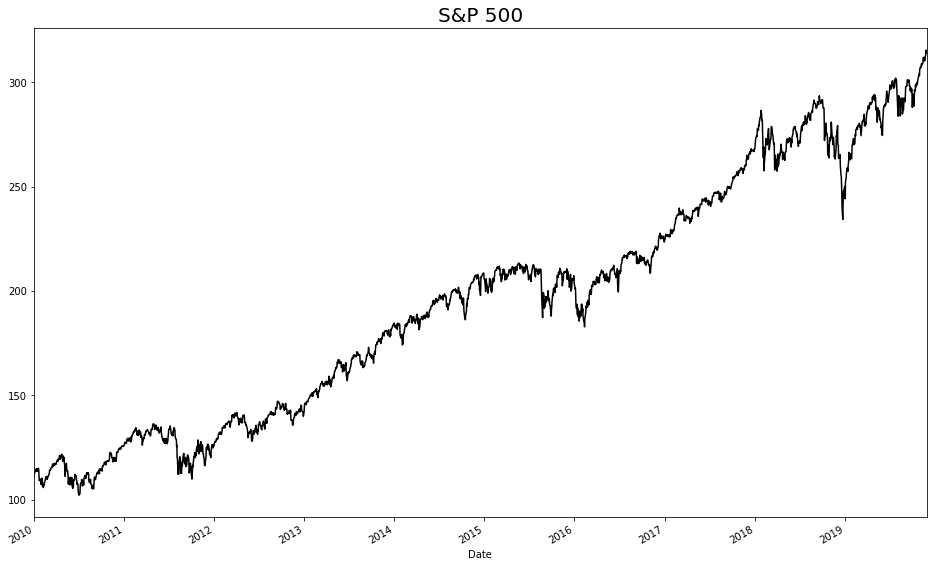

In [81]:
# Data to plot:
price_close = spy_df['Close']

# Plot:
fig, ax = plt.subplots(figsize = (16, 10))
price_close.plot(color = 'k')
plt.title("S&P 500", fontsize = 20);

## 4.3 Plot with OHLC candlesticks:

Luckily, the library called Plotly is available and open-source for ploting amazing graphs in python. One of these graphs allows for a dashboard style of plotting and makes it very intuitive. There is even an option to plot candlesticks with volume.

To get this section of code to work, please follow the installation of the 'OFFLINE' mode. This is so that the notebook can render the plot.ly package plots.

NOTE: Plotly renderers are compatible with Chrome browser, Apple's Safari cannot be used.

Plotly Installation link: https://plot.ly/python/getting-started/#initialization-for-offline-plotting

Plotly Candlestick link: https://plot.ly/python/candlestick-charts/

Advance chart: https://plot.ly/~jackp/17421/plotly-candlestick-chart-in-python/#/

In [82]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go

plotly.offline.init_notebook_mode(connected=True)

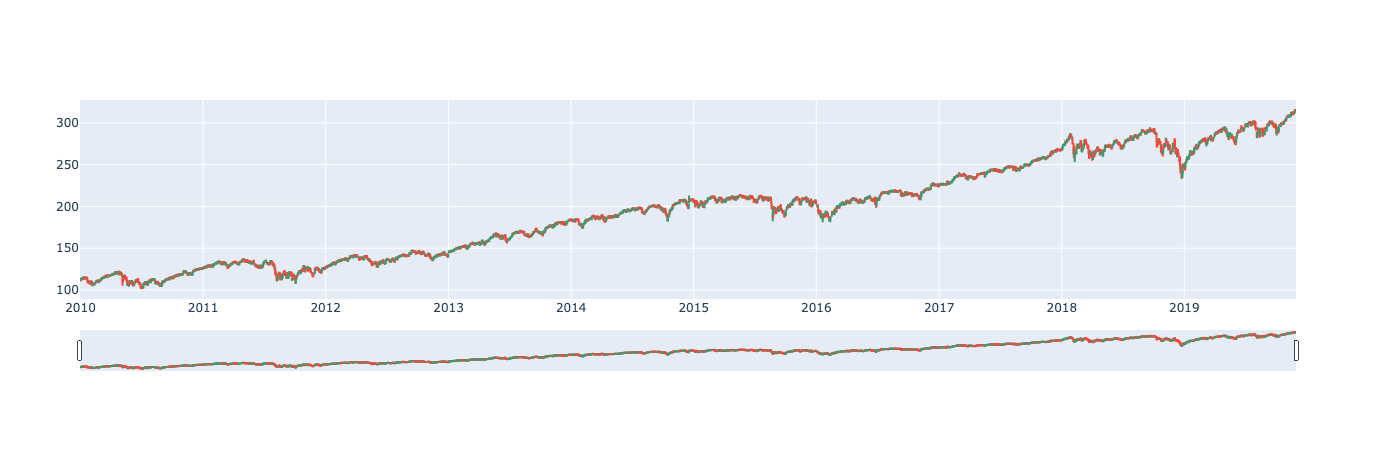

In [83]:
df = spy_df.copy()

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

# 5 Exploratory Data Analysis:

## 5.1 Check the amount of returns over this current period, if an investment in this EFT was made.

In [84]:
# Opening Price on the First day of trading:
first_open = spy_df['Open'].iloc[0]
print('The first opening price is: ${:.2f}'.format(first_open))

The first opening price is: $112.77


In [85]:
# Closing Price on the last day of trading: current day.
last_close = spy_df['Close'].iloc[-1]
print('The closing opening price on the last day is: ${:.2f}'.format(last_close))

The closing opening price on the last day is: $314.31


In [86]:
# Difference between the prices is the profit:
profit = last_close - first_open
print('The price difference is: ${:.2f}'.format(profit) + ' in the positive.')

growth = (profit/first_open) * 100
print('Growth would be: {:.2f}'.format(growth) + '%. Or {:.2f}'.format(growth) + ' Points')

The price difference is: $201.54 in the positive.
Growth would be: 178.72%. Or 178.72 Points


## 5.2 Check the amount of returns over the same period on Intraday Gains:

This will assume that stocks are bought at the opening price of each day and subsequently sold at the closing price on the same day.

In [87]:
spy_df['Daily Change'] = pd.Series(spy_df['Close'] - spy_df['Open'])
spy_df['Daily Change']

Date
2009-12-31   -1.329994
2010-01-04    0.959999
2010-01-05    0.369995
2010-01-06    0.190002
2010-01-07    0.690002
                ...   
2019-11-22   -0.130005
2019-11-25    1.389984
2019-11-26    0.669983
2019-11-27    0.870026
2019-11-29   -0.549988
Name: Daily Change, Length: 2496, dtype: float64

In [88]:
intraday_growth = spy_df['Daily Change'].sum()
print('Growth would be: {:.2f}'.format(intraday_growth) + ' Points')

Growth would be: 69.91 Points


#### Immediately it can be seen that there is a lost of around 100 Points. 

## 5.3 Check the Volatility of the Returns: 

#### Examine how the overnight trades are when compared to the intraday trades on the basis of their standard deviation.

Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured as either the standard deviation or variance between returns from that same security or market index. ref: https://www.investopedia.com/terms/v/volatility.asp.

From the observations above, the overnight returns seemed to be much better at 179 points compared to intrady returns at 70 points. The volatiility must also be considered as returns are jugded on a risk-adjusted basis.

In [15]:
# Standard deviation of the Daily change:
np.std(spy_df['Daily Change'])

1.3850971947499575

In [16]:
# Create a column for the overnight change:
spy_df['Overnight Change'] = pd.Series(spy_df['Open'] - spy_df['Close'].shift(1))

# Standard Deviation of the Overnight Change:
np.std(spy_df['Overnight Change'])

1.0348376827684886

#### Comparning the output above, the lower standard deviation number of 1.03 from the Overnight Change means that higher gains can be achieved and with lower volatility. It should be noted that not all volatility  is equal.

#### Next, is to inspect what the mean change is like on the downside days against upside days for both strategies. Strategies being intraday trading vs. overnight trading.

In [17]:
# Daily Change average:
spy_df[ spy_df['Daily Change'] < 0 ]['Daily Change'].mean()

-1.00862535067967

In [18]:
# Overnight Change average:
spy_df[ spy_df['Overnight Change'] < 0 ]['Overnight Change'].mean()

-0.7304283162507492

#### Similarly, the average downside volatility is less ofr the Overnight Trading compared to the Intraday Trading.

## 5.4 Check the Daily Returns:

The above methods explores the data in terms of points, this next part will look into daily returns to provide a better understanding of the gain and losses. 

There will be 3 scenarios: 
- Daily Returns ( close to close price change )
- Intraday Returns 
- Overnight Returns

In [19]:
# Daily Returns:
daily_return = ( spy_df['Close'] - spy_df['Close'].shift(1) ) / ( spy_df['Close'].shift(1) ) * 100

# Intraday Returns:
intraday_return = ( (spy_df['Close'] - spy_df['Open']) / (spy_df['Open']) ) * 100

# Overnight Returns:
overnight_return = ( (spy_df['Open'] - spy_df['Close'].shift(1)) / spy_df['Close'].shift(1) ) * 100

In [20]:
# Inspect:
daily_return

Date
2009-12-31         NaN
2010-01-04    1.695979
2010-01-05    0.264710
2010-01-06    0.070406
2010-01-07    0.422129
                ...   
2019-11-22    0.222388
2019-11-25    0.775020
2019-11-26    0.226567
2019-11-27    0.445754
2019-11-29   -0.370868
Name: Close, Length: 2496, dtype: float64

# 6 Statistics for all the Strategies:

Taking a look at the statistics regarding each of the strategy, where these are the winning, losing and break-even trades. The Sharpe Ratio can be used to judge the returns on a risk-adjusted basis. The method compares returns by accounthing for the volatility of the returns.

The ratio describes how much excess return you receive for the extra volatility you endure for holding a riskier asset.

ref: https://www.investopedia.com/articles/07/sharpe_ratio.asp

In [21]:
# User Defined Function: Statistics.

def trade_statistics(strategy, n = 252):
    s = strategy.dropna()
    
    # winning, losing and break-even trades:
    wins = len(s[s > 0])
    losses = len(s[s < 0])
    evens = len(s[s == 0])
    
    # Mean calc.:
    mean_win = round(s[s > 0].mean(), 3)
    mean_loss = round(s[s < 0].mean(), 3)
    
    # Win ratio:
    win_ratio = round( wins/losses, 3)
    
    # Mean trade:
    mean_trd = round(s.mean(), 3)
    
    # Standard Deviation:
    standard_deviation = round( np.std(s), 3)
    
    # Maximum win and loss:
    max_l = round(s.min(), 3)
    max_w = round(s.max(), 3)
    
    # Sharpe Ratio:
    sharpe_ratio = round((s.mean() / np.std(s)) * np.sqrt(n), 4)
    
    count = len(s)
    
    # Print the Statistics:
    print('Trades:', count,\
            '\nWins:', wins,\
            '\nLosses:', losses,\
            '\nBreakeven:', evens,\
            '\nWin/Loss Ratio', win_ratio,\
            '\nMean Win:', mean_win,\
            '\nMean Loss:', mean_loss,\
            '\nMean', mean_trd,\
            '\nStd Dev:', standard_deviation,\
            '\nMax Loss:', max_l,\
            '\nMax Win:', max_w,\
            '\nSharpe Ratio:', sharpe_ratio)

#### Find the statistics for each Trading Strategy:
1. Buy and Hold -> Daily Returns
2. Intraday returns/Trades 
3. Overnight returns/Trades

In [22]:
# 1. Buy and Hold -> Daily Returns:
trade_statistics(daily_return)

Trades: 2495 
Wins: 1369 
Losses: 1116 
Breakeven: 10 
Win/Loss Ratio 1.227 
Mean Win: 0.629 
Mean Loss: -0.668 
Mean 0.046 
Std Dev: 0.932 
Max Loss: -6.512 
Max Win: 5.052 
Sharpe Ratio: 0.7821


In [23]:
# 2. Intraday returns/Trades:
trade_statistics(intraday_return)

Trades: 2496 
Wins: 1357 
Losses: 1120 
Breakeven: 19 
Win/Loss Ratio 1.212 
Mean Win: 0.478 
Mean Loss: -0.536 
Mean 0.019 
Std Dev: 0.72 
Max Loss: -4.175 
Max Win: 4.327 
Sharpe Ratio: 0.4265


In [24]:
# 3. Overnight returns/Trades:
trade_statistics(overnight_return)

Trades: 2495 
Wins: 1342 
Losses: 1121 
Breakeven: 32 
Win/Loss Ratio 1.197 
Mean Win: 0.381 
Mean Loss: -0.398 
Mean 0.026 
Std Dev: 0.566 
Max Loss: -5.227 
Max Win: 4.09 
Sharpe Ratio: 0.727


From the statistics above, it can be seen that by comparing the Mean (Mean returnn) and the Standard  Deviation between all the strategies: 
- Position 1 -> The Buy-and-Hold method provides teh highest mean return (at 0.046) and standard deviation (0.932). It also have the largest daily drawdonw or Loss (at -6.512).
- Position 2 ->The next best is the Overnight trades, where it has a Mean return at 0.026 and a standard deviation of 0.566 (less volatile). 
- Position 3 ->The Intraday trades presents as the worst approach to trading in this case.

Overall, these results are reflected in the Sharpe Ratio and can be ranked accordingly(by positions).

# 7 Real Risk in Trading Strategy Development is called the Data Mining Fallacy:

This is when enough strategies are tested by performaning many random overnight signals and choose the best ones (like generating 5,000 signals overnight), and by some random chance, an amazing outcome would be found through data mining. __This cannot be used__.

It is important to note that trading strategies have to be anchored to real-world investor biases and behaviours. The idea is to trade the people who trade the markets. The advantage comes from developing the understanding when people might react incorrectly to news or certain situations.

## 7.1 Further Analysis:

Begin with using more data, starting from the year 2000.

In [25]:
start_date = pd.to_datetime('2000-01-01')
stop_date = pd.to_datetime('2019-12-01')

In [26]:
# Get the data:
spy_2000_df = pdr.data.get_data_yahoo('SPY', start_date, stop_date)

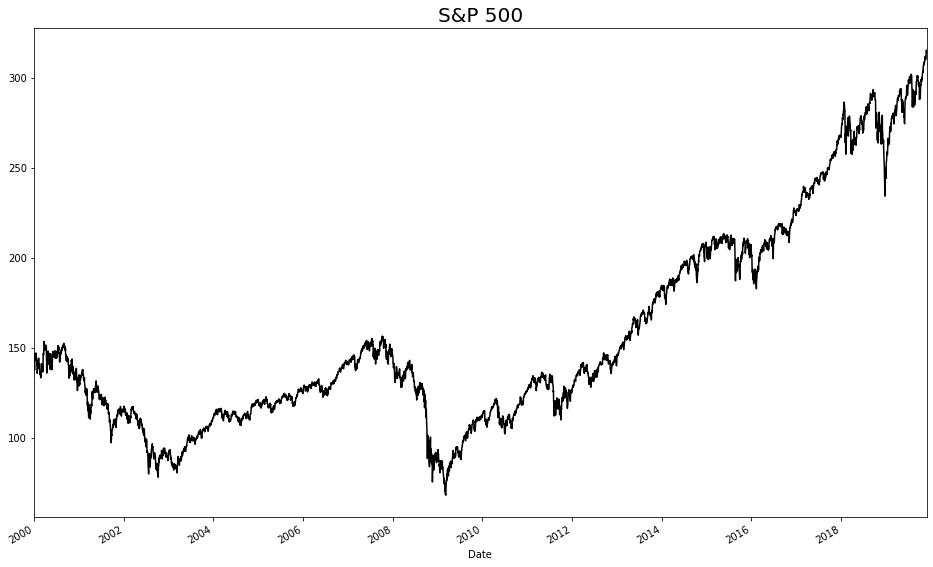

In [27]:
# Data to plot:
price_close = spy_2000_df['Close']

# Plot:
fig, ax = plt.subplots(figsize = (16, 10))
price_close.plot(color = 'k')
plt.title("S&P 500", fontsize = 20);

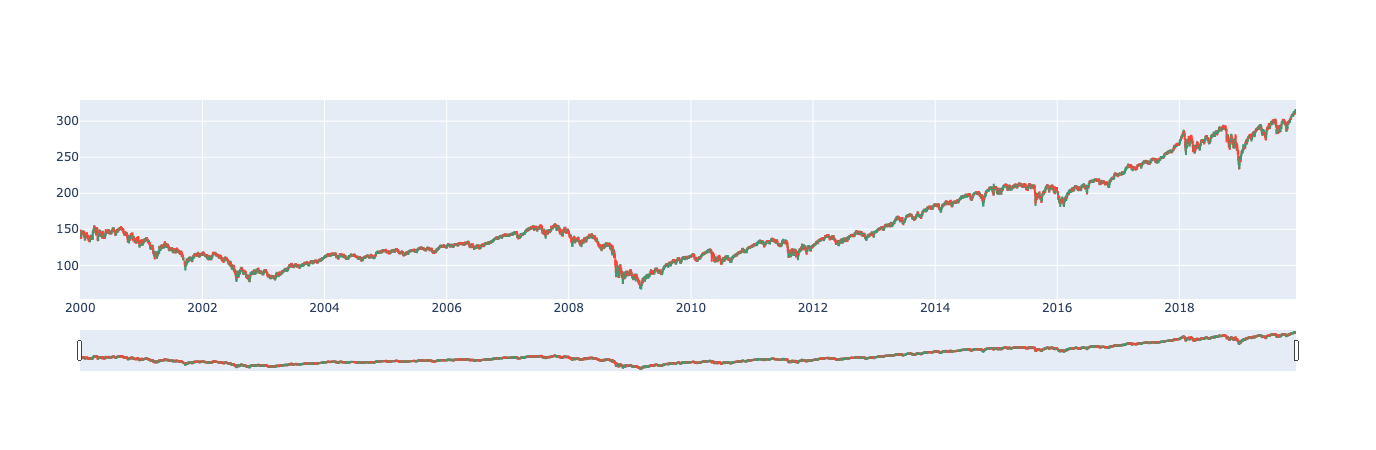

In [28]:
df = spy_2000_df.copy()

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

This can be seen to show more price movement than the data starting from 2010. There can be seen that there are 4 or 5 major dips in price, but overal the trend of the price is moving in the positive direction.

## 7.2 Find the baseline for this Data (2000 to 2019):

In [29]:
# Assign the variables:

# Daily Returns:
daily_return_2000 = ( spy_2000_df['Close'] - spy_2000_df['Close'].shift(1) ) / ( spy_2000_df['Close'].shift(1) ) * 100

# Intraday Returns:
intraday_return_2000 = ( (spy_2000_df['Close'] - spy_2000_df['Open']) / (spy_2000_df['Open']) ) * 100

# Overnight Returns:
overnight_return_2000 = ( (spy_2000_df['Open'] - spy_2000_df['Close'].shift(1)) / spy_2000_df['Close'].shift(1) ) * 100

In [30]:
# Calculate the total Points for each of the strategy above:
daily_return_Points = ( spy_2000_df['Close'] - spy_2000_df['Close'].shift(1) ).sum()

print('The total points for Daily_Returns is: {:.2f}'.format(daily_return_Points) + ' Points')

The total points for Daily_Returns is: 167.43 Points


In [31]:
intraday_return_Points = ( spy_2000_df['Close'] - spy_2000_df['Open'] ).sum()

print('The total points for Intraday_Return is: {:.2f}'.format(intraday_return_Points) + ' Points')

The total points for Intraday_Return is: -9.00 Points


In [32]:
Overnight_return_Points = ( spy_2000_df['Open'] - spy_2000_df['Close'].shift(1) ).sum()

print('The total points for Overnight_Returns is: {:.2f}'.format(Overnight_return_Points) + ' Points')

The total points for Overnight_Returns is: 176.47 Points


## 7.3 Get the Statistics for these trading strategies:

In [33]:
# Daily return Trade Statistics for the 2000 to 2019 data:
trade_statistics(daily_return_2000)

Trades: 5010 
Wins: 2692 
Losses: 2299 
Breakeven: 19 
Win/Loss Ratio 1.171 
Mean Win: 0.762 
Mean Loss: -0.843 
Mean 0.022 
Std Dev: 1.199 
Max Loss: -9.845 
Max Win: 14.52 
Sharpe Ratio: 0.2962


In [34]:
# Intraday return Trade Statistics for the 2000 to 2019 data:
trade_statistics(intraday_return_2000)

Trades: 5011 
Wins: 2635 
Losses: 2338 
Breakeven: 38 
Win/Loss Ratio 1.127 
Mean Win: 0.633 
Mean Loss: -0.708 
Mean 0.003 
Std Dev: 0.989 
Max Loss: -8.991 
Max Win: 8.435 
Sharpe Ratio: 0.0472


In [35]:
# Overnight return Trade Statistics for the 2000 to 2019 data:
trade_statistics(overnight_return_2000)

Trades: 5010 
Wins: 2673 
Losses: 2279 
Breakeven: 58 
Win/Loss Ratio 1.173 
Mean Win: 0.413 
Mean Loss: -0.442 
Mean 0.019 
Std Dev: 0.656 
Max Loss: -8.322 
Max Win: 6.068 
Sharpe Ratio: 0.4674


#### When more data is available, the statistics shows that:
- If money was held during the day (Intraday) for the past 19 years, it is highly likely that money would have been lost (at -9.00 Points). This can be seen with the Sharpe Ratio of 0.0472, where the gains is very low for the additional volatility and risk.
- Both the Daily return and Overnight strategy seems to be performing better, as the Sharpe Ratio(s) are higher, it means that even with the greater volatility, money would still be made. 
- If money was held overnight, it would be possible to earn money (at 176.47 Points).

# 8 Building a Regression Model:

This section begins with building a basic __Regression model__ that considers the stock's prior closing values to predict the next day's close price. 

Next sectionn would then extend the model by incorporating support vectors, forming the model as a __Support Vector Regression__.

SVR Maths link: https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html

SVR Intuition 1: https://medium.com/coinmonks/support-vector-regression-or-svr-8eb3acf6d0ff
SVR Intuition 2: http://www.saedsayad.com/support_vector_machine_reg.htm

## 8.1 Create a DataFrame with Price History: 

For the base model, the dataset requires the price history for each day. This means that for each row of the price on the current day, there will be multiple columns (up to 20, for 20 previous days) of previous day prices. This can be demonstrated  below.

In [36]:
# Create DataFrame:
spy_past_df = spy_2000_df.copy()


for i in range(1, 21, 1):
    # Create Columns for price history:
    spy_past_df.loc[:, 'Close Minus' + str(i)] = spy_past_df['Close'].shift(i)


In [37]:
spy_past_df

,High,Low,Open,Close,Volume,Adj Close,Close Minus1,Close Minus2,Close Minus3,Close Minus4,...,Close Minus11,Close Minus12,Close Minus13,Close Minus14,Close Minus15,Close Minus16,Close Minus17,Close Minus18,Close Minus19,Close Minus20
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,147.500000,146.250000,146.843750,146.875000,3172700.0,100.967140,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,148.250000,143.875000,148.250000,145.437500,8164300.0,99.978989,146.875000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,144.062500,139.640625,143.531250,139.750000,8089800.0,96.069160,145.437500,146.875000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,141.531250,137.250000,139.937500,140.000000,12177900.0,96.241058,139.750000,145.437500,146.875000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,141.500000,137.750000,139.625000,137.750000,6227200.0,94.694298,140.000000,139.750000,145.437500,146.875000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-22,311.239990,309.850006,311.089996,310.959991,44850200.0,309.438629,310.269989,310.769989,311.929993,312.019989,...,308.179993,307.100006,307.029999,307.369995,306.140015,303.329987,304.140015,303.209991,303.299988,301.600006
2019-11-25,313.369995,311.980011,311.980011,313.369995,48647200.0,311.836853,310.959991,310.269989,310.769989,311.929993,...,308.940002,308.179993,307.100006,307.029999,307.369995,306.140015,303.329987,304.140015,303.209991,303.299988
2019-11-26,314.279999,313.059998,313.410004,314.079987,37569000.0,312.543365,313.369995,310.959991,310.269989,310.769989,...,308.350006,308.940002,308.179993,307.100006,307.029999,307.369995,306.140015,303.329987,304.140015,303.209991


#### Seems like there are some missing or NaN values present because there isnt any price data that are earlier than 1999-12-31. 

In [38]:
# Fix the missing data in the DataFrame:
spy_past20_df = spy_past_df[ [x for x in spy_past_df.columns if 'Close Minus' in x or x == 'Close'] ].iloc[20:, ]

In [39]:
spy_past20_df

,Close,Close Minus1,Close Minus2,Close Minus3,Close Minus4,Close Minus5,Close Minus6,Close Minus7,Close Minus8,Close Minus9,...,Close Minus11,Close Minus12,Close Minus13,Close Minus14,Close Minus15,Close Minus16,Close Minus17,Close Minus18,Close Minus19,Close Minus20
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,...,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000,145.437500,146.875000
2000-02-01,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,...,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000,145.437500
2000-02-02,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,...,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000
2000-02-03,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,...,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000
2000-02-04,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,...,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-22,310.959991,310.269989,310.769989,311.929993,312.019989,311.790009,309.549988,309.100006,309.000000,308.350006,...,308.179993,307.100006,307.029999,307.369995,306.140015,303.329987,304.140015,303.209991,303.299988,301.600006
2019-11-25,313.369995,310.959991,310.269989,310.769989,311.929993,312.019989,311.790009,309.549988,309.100006,309.000000,...,308.940002,308.179993,307.100006,307.029999,307.369995,306.140015,303.329987,304.140015,303.209991,303.299988
2019-11-26,314.079987,313.369995,310.959991,310.269989,310.769989,311.929993,312.019989,311.790009,309.549988,309.100006,...,308.350006,308.940002,308.179993,307.100006,307.029999,307.369995,306.140015,303.329987,304.140015,303.209991


Seems like the issue have been fix, where the data now consist all of the required historical prices, however taking a look at the index, it now begins on the 2000-01-31 rather than 1999-12-31.

It should be noted that 'spy_past20_df' will be the X_array or input to the model.

#### Although the data frame has the correct information, it should be noted that the order of the prices are not correct. 

#### Where if the model was to be trained, it would now take in the updated price in the column for everyday then learns the past prices (think Zig-Zag pattern). This is incorrect. The order should begin with the previous day(s) price data.

In [40]:
# Fix the price ordering of the data:
spy_past20_df = spy_past20_df.iloc[:, ::-1]
spy_past20_df

,Close Minus20,Close Minus19,Close Minus18,Close Minus17,Close Minus16,Close Minus15,Close Minus14,Close Minus13,Close Minus12,Close Minus11,...,Close Minus9,Close Minus8,Close Minus7,Close Minus6,Close Minus5,Close Minus4,Close Minus3,Close Minus2,Close Minus1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,146.875000,145.437500,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,...,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500
2000-02-01,145.437500,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,...,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500
2000-02-02,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,...,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500
2000-02-03,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,...,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500
2000-02-04,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,...,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-22,301.600006,303.299988,303.209991,304.140015,303.329987,306.140015,307.369995,307.029999,307.100006,308.179993,...,308.350006,309.000000,309.100006,309.549988,311.790009,312.019989,311.929993,310.769989,310.269989,310.959991
2019-11-25,303.299988,303.209991,304.140015,303.329987,306.140015,307.369995,307.029999,307.100006,308.179993,308.940002,...,309.000000,309.100006,309.549988,311.790009,312.019989,311.929993,310.769989,310.269989,310.959991,313.369995
2019-11-26,303.209991,304.140015,303.329987,306.140015,307.369995,307.029999,307.100006,308.179993,308.940002,308.350006,...,309.100006,309.549988,311.790009,312.019989,311.929993,310.769989,310.269989,310.959991,313.369995,314.079987


## 8.2 Train the Model: SVR

#### Import the required model from package:

In [41]:
from sklearn.svm import SVR

In [42]:
'''
kernel : string, optional (default='rbf')
     Specifies the kernel type to be used in the algorithm.
     It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
     a callable.
     If none is given, 'rbf' will be used. If a callable is given it is
     used to precompute the kernel matrix.
'''
# Set the SVR to linear:
model = SVR(kernel='linear')

#### Set up the training and testing dataset: taking a 3000 for training and 2000 for testing split.

In [43]:
X_train = spy_past20_df[:-2000]
y_train = spy_past20_df['Close'].shift(-1)[:-2000]

In [44]:
X_test = spy_past20_df[-2000:]
y_test = spy_past20_df['Close'].shift(-1)[-2000:]

#### Train the SVR-Linear Model:

In [45]:
model_fit = model.fit(X_train, y_train)

#### Test the model with the Testing Data:

In [46]:
preds = model_fit.predict(X_test)

At this point, the model have been fitted and used for predictions. 

## 8.3 Compare the predictions to the actual data: y_test.

In [47]:
# Create the data list for the DataFrame:

compare_dat_list = list(zip(y_test, preds))

columnNames = ['Next Day Close', 'Predicted Next Close']

# Create the DataFrame:
compare_preds_df = pd.DataFrame(data=compare_dat_list, index=y_test.index, columns=columnNames)
compare_preds_df

,Next Day Close,Predicted Next Close
Date,,
2011-12-19,123.930000,120.656289
2011-12-20,124.169998,124.102558
2011-12-21,125.269997,124.359183
2011-12-22,126.389999,125.488270
2011-12-23,126.489998,126.214884
...,...,...
2019-11-22,313.369995,310.804463
2019-11-25,314.079987,313.202477
2019-11-26,315.480011,313.780262


It can be seen that the values do closely match each other, however, more analysis would be required.

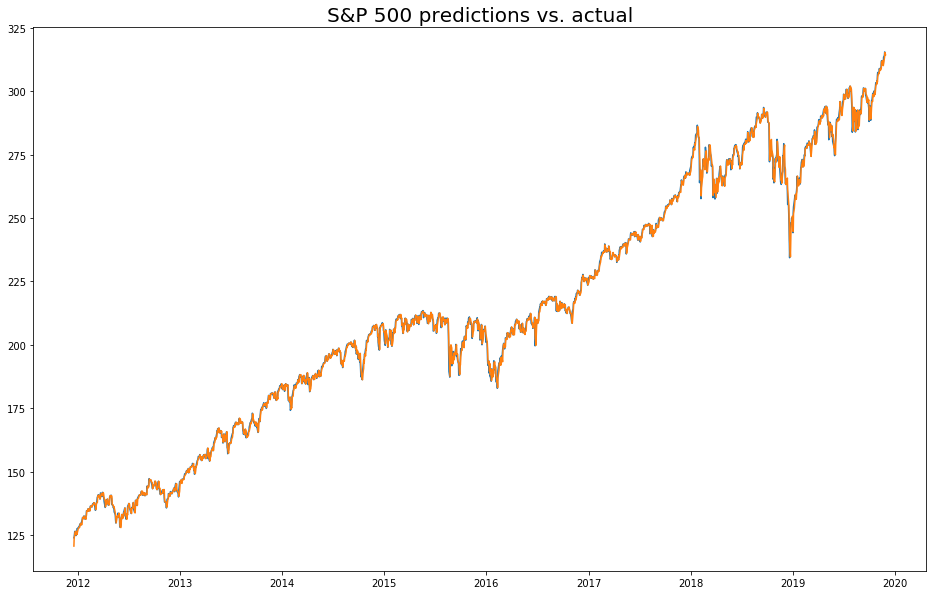

In [48]:
# Plot:
fig, ax = plt.subplots(figsize = (16, 10))
plt.plot(compare_preds_df)
plt.title("S&P 500 predictions vs. actual", fontsize = 20);

From the above plot, it seems like the predicted values to somewhat follow the original price data. But furhter investigation is required to find the amount of error in the predicted price.

# 9 Evaluating the Perfomance of the Model:

To take a look at the performance of the model can be done by implementing the following:
- Set to buy the next day's open price, if the close price have been predicted to be higher than the open price.
- Followed by selling it at the closing price at the end of the day.
- This will require additional data to be included, such as the Open price and Closing price (last 1000).

## 9.1 Implement the above mentioned methods into a new DataFrame:

In [49]:
# Additional Data Point: Open Price and Closing Price

# Take the last 1000 rows of the closing price:
CurrentDayClose_df = spy_2000_df[['Close']].iloc[-1000:]

# Take the last 1000 rows of the opening price and shift it a day back:
NextDayOpen_df = spy_2000_df[['Open']].iloc[-1000:].shift(-1)

In [50]:
# Merge the additional Data Points with the 'compare_preds_df':
temp_df1 = pd.merge(compare_preds_df, CurrentDayClose_df, left_index=True, right_index=True)

temp_df2 = pd.merge(temp_df1, NextDayOpen_df, left_index=True, right_index=True)

# Set the Column Names:
temp_df2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']

In [51]:
# Inspect:
temp_df2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2015-12-10,201.880005,205.742581,205.869995,203.350006
2015-12-11,202.899994,202.287728,201.880005,202.070007
2015-12-14,205.029999,202.759927,202.899994,204.699997
2015-12-15,208.029999,205.026501,205.029999,206.369995
2015-12-16,204.860001,207.835859,208.029999,208.399994
...,...,...,...,...
2019-11-22,313.369995,310.804463,310.959991,311.980011
2019-11-25,314.079987,313.202477,313.369995,313.410004
2019-11-26,315.480011,313.780262,314.079987,314.609985


## 9.2 Add singals to the Dataset: Signal 

Depending on the outcome between the Open and Close Price, a signal will be set to 1 or 0. Here if the Predicted Next Close price is more than the Open price of the following day, it will be given a signal of 1.

Next is, for those that have been assigned a signal of 1, the return (Profit and Loss) will be calculated.

In [52]:
# User defined Func:
# 1 - Set the signal for trade:
def get_signal(dataset):
    if ( dataset['Predicted Next Close'] > dataset['Next Day Open'] ):
        return 1
    else: 
        return 0
    
# 2 - Func. to calc the return for signals that are set to 1:
def get_return(dataset):
    if ( dataset['Signal'] == 1 ):
        return ( (dataset['Next Day Close'] - dataset['Next Day Open']) / dataset['Next Day Open'] ) * 100
    else:
        return 0


In [53]:
# Apply the functions above to the dataset:

# Set the Signals:
temp_df2 = temp_df2.assign(Signal = temp_df2.apply(get_signal, axis = 1))

# Calc the return (Profit and Loss) for signals that are set to 1:
temp_df2 = temp_df2.assign(Return_signals = temp_df2.apply(get_return, axis = 1))

In [54]:
# Inspect:
temp_df2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,Return_signals
Date,,,,,,
2015-12-10,201.880005,205.742581,205.869995,203.350006,1,-0.722892
2015-12-11,202.899994,202.287728,201.880005,202.070007,1,0.410742
2015-12-14,205.029999,202.759927,202.899994,204.699997,0,0.000000
2015-12-15,208.029999,205.026501,205.029999,206.369995,0,0.000000
2015-12-16,204.860001,207.835859,208.029999,208.399994,0,0.000000
...,...,...,...,...,...,...
2019-11-22,313.369995,310.804463,310.959991,311.980011,0,0.000000
2019-11-25,314.079987,313.202477,313.369995,313.410004,0,0.000000
2019-11-26,315.480011,313.780262,314.079987,314.609985,0,0.000000


## 9.3 Check the overall performance of the model and see if any profits are made:

Begin by defining the __Price History__ as follows:

In [55]:
# Find the Data Points that are of Signal 1 and subtract the Close price by the Open price:
profit_or_Loss = temp_df2[temp_df2['Signal'] == 1]['Next Day Close'] - temp_df2[temp_df2['Signal'] == 1]['Next Day Open']

In [56]:
# Sum:
profit_or_Loss.sum()

5.8898468017578125

Interestingly, the model has made some money, providing a 5.89 points return. This is good, however it does not mean that this is 100% full proof. As of recent times, the market has been doing well, which will contribute to this return. 

#### Now let's check out how many points the intraday strategy will perform for the last 2,000 days:

In [65]:
# Intraday Strategy (Points):
intraday_profit_or_Loss = spy_2000_df['Close'].iloc[-2000:] - spy_2000_df['Open'].iloc[-2000:]
intraday_profit_or_Loss.sum()

67.36956024169922

It seems like this strategy does not provide much in return as well. 

### Compare:

#### Get the Statistics on the Intraday Strategy:

In [58]:
trade_statistics((intraday_profit_or_Loss) / spy_2000_df['Open'].iloc[-2000:] * 100)

Trades: 2000 
Wins: 1086 
Losses: 898 
Breakeven: 16 
Win/Loss Ratio 1.209 
Mean Win: 0.437 
Mean Loss: -0.48 
Mean 0.022 
Std Dev: 0.653 
Max Loss: -4.175 
Max Win: 4.327 
Sharpe Ratio: 0.5348


#### Checkout the Statistics on the Model:

In [59]:
trade_statistics(temp_df2['Return_signals'])

Trades: 1000 
Wins: 223 
Losses: 176 
Breakeven: 601 
Win/Loss Ratio 1.267 
Mean Win: 0.482 
Mean Loss: -0.584 
Mean 0.005 
Std Dev: 0.492 
Max Loss: -3.481 
Max Win: 3.535 
Sharpe Ratio: 0.1481


From the above statistics regarding the Model, it can be seen that the Sharpe Ratio is 0.1481 and that the win/loss ratio only imporved by 0.06, meaning that the return in not as high given the risk. Therefore, this strategy is the suitable for implementation. 

#### Building on this, How can it be improve?
- Modifying the trading strategy?
- Take trades that are expected to be greater by a point or more than the open price?

These are possible ideas for exploration. 

## 9.4 Change of strategy with modified Signals:

In [60]:
'''
Modifications: added a '+ 1' in the 'get_signal' function.
'''
# User defined Func:
# 1 - Set the signal for trade:
def get_signal(dataset):
    if ( dataset['Predicted Next Close'] > dataset['Next Day Open'] + 1):
        return 1
    else: 
        return 0
    
# 2 - Func. to calc the returns (Profit and Loss) for signals that are set to 1:
def get_return(dataset):
    if ( dataset['Signal'] == 1 ):
        return ( (dataset['Next Day Close'] - dataset['Next Day Open']) / dataset['Next Day Open'] ) * 100
    else:
        return 0


In [61]:
# Apply the functions above:
temp_df2 = temp_df2.assign(Signal = temp_df2.apply(get_signal, axis = 1))
temp_df2 = temp_df2.assign(Return_signals = temp_df2.apply(get_return, axis = 1))
temp_df2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,Return_signals
Date,,,,,,
2015-12-10,201.880005,205.742581,205.869995,203.350006,1,-0.722892
2015-12-11,202.899994,202.287728,201.880005,202.070007,0,0.000000
2015-12-14,205.029999,202.759927,202.899994,204.699997,0,0.000000
2015-12-15,208.029999,205.026501,205.029999,206.369995,0,0.000000
2015-12-16,204.860001,207.835859,208.029999,208.399994,0,0.000000
...,...,...,...,...,...,...
2019-11-22,313.369995,310.804463,310.959991,311.980011,0,0.000000
2019-11-25,314.079987,313.202477,313.369995,313.410004,0,0.000000
2019-11-26,315.480011,313.780262,314.079987,314.609985,0,0.000000


#### Now let's check out how many points the intraday strategy (modified Signal) will perform:

Where this will be compared to the Price history, which was a gain of 5.89 points.

In [62]:
# Find the Data Points that are of Signal 1 and subtract the Close price by the Open price:
profit_or_Loss = temp_df2[temp_df2['Signal'] == 1]['Next Day Close'] - temp_df2[temp_df2['Signal'] == 1]['Next Day Open']
profit_or_Loss.sum()

2.8997955322265625

It can be seen that the current gains are not as much, at 2.89 Points, compared to the 5.89 Points.

#### Checkout the Statistics on the Model:

In [63]:
# Get the statistics:
trade_statistics(temp_df2['Return_signals'])

Trades: 1000 
Wins: 62 
Losses: 59 
Breakeven: 879 
Win/Loss Ratio 1.051 
Mean Win: 0.781 
Mean Loss: -0.782 
Mean 0.002 
Std Dev: 0.363 
Max Loss: -3.481 
Max Win: 3.535 
Sharpe Ratio: 0.0998


It can be seen that Sharpe Ratio (at 0.0998) is higher than before (at 0.01481), even though the win/loss ratio is lower.

#### Overall, this suggest that even if the price history seems to suggest good things were to come, but as a trader, you'd expect this to be precisely opposite. This then forms the basis of a contrarian indicator with the current model.

Now lets explore more on this: to confirm that it is a contrarian model.
- Take a look at the gains if the model were to be flipped. Where if strong gains were to be predicted, no further trade is made but otherwise the following would be done.

In [89]:
'''
Modifications: the return 0 or 1 has been flipped.
'''
# User defined Func:
# 1 - Set the signal for trade:
def get_signal(dataset):
    if ( dataset['Predicted Next Close'] > dataset['Next Day Open'] + 1):
        return 0
    else: 
        return 1
    
# 2 - Func. to calc the returns (Profit and Loss) for signals that are set to 1:
def get_return(dataset):
    if ( dataset['Signal'] == 1 ):
        return ( (dataset['Next Day Close'] - dataset['Next Day Open']) / dataset['Next Day Open'] ) * 100
    else:
        return 0


In [90]:
# Apply the functions above:
temp_df2 = temp_df2.assign(Signal = temp_df2.apply(get_signal, axis = 1))
temp_df2 = temp_df2.assign(Return_signals = temp_df2.apply(get_return, axis = 1))
temp_df2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,Return_signals
Date,,,,,,
2015-12-10,201.880005,205.742581,205.869995,203.350006,0,0.000000
2015-12-11,202.899994,202.287728,201.880005,202.070007,1,0.410742
2015-12-14,205.029999,202.759927,202.899994,204.699997,1,0.161212
2015-12-15,208.029999,205.026501,205.029999,206.369995,1,0.804382
2015-12-16,204.860001,207.835859,208.029999,208.399994,1,-1.698653
...,...,...,...,...,...,...
2019-11-22,313.369995,310.804463,310.959991,311.980011,1,0.445536
2019-11-25,314.079987,313.202477,313.369995,313.410004,1,0.213772
2019-11-26,315.480011,313.780262,314.079987,314.609985,1,0.276541


#### Check how many Points from this Flipped singal model:

This is compared with the 2.89 Points from before.

In [91]:
# Find the Data Points that are of Signal 1 and subtract the Close price by the Open price:
profit_or_Loss = temp_df2[temp_df2['Signal'] == 1]['Next Day Close'] - temp_df2[temp_df2['Signal'] == 1]['Next Day Open']
profit_or_Loss.sum()

21.129486083984375

It can be seen that there is almost a 10x gain in points. __This means that there is a contrarian indicator here__. When the model predicts a strong next day gain(s), but in reality the market would significantly underperform. Note that this is during the specified test period, and this behaviour most likely will not hold in most scenarios, as the markets tend to flip from one regimes (of mean reversion) to another regime (of trend persistance).

#### Check out the Statistics for this Flipped model:

In [92]:
# Get the statistics:
trade_statistics(temp_df2['Return_signals'])

Trades: 999 
Wins: 473 
Losses: 396 
Breakeven: 130 
Win/Loss Ratio 1.194 
Mean Win: 0.38 
Mean Loss: -0.422 
Mean 0.012 
Std Dev: 0.564 
Max Loss: -3.873 
Max Win: 4.327 
Sharpe Ratio: 0.3517
